# Tutor Feedback
Very nice in-depth analysis and generally well-structured notebook. The last part of Ex2 contains a coding error, but your solution is certainly sufficient to get the point.

Ex1: 1/1
Ex2: 1/1
Ex3: 1/1

In [1]:
import numpy as np
import matplotlib.pylab as plt
import numpy.random as rd

from sklearn.datasets import fetch_openml # MNIST data
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

#os.environ["CUDA_VISIBLE_DEVICES"] = '0'
#sess = tf.Session(config=tf.ConfigProto(device_count={'GPU': 0}))
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import UpSampling2D
from keras.layers import Input
from keras.layers import concatenate
from keras.layers import Cropping2D

from PIL import Image
import matplotlib.image as mpimg

Using TensorFlow backend.


## A1 - Clustering

### A1 - a - Performance of different linkages on samples

Linkage information:

 - ward minimizes the variance of the clusters being merged.
 - average uses the average of the distances of each observation of the two sets.
 - complete or maximum linkage uses the maximum distances between all observations of the two sets.
 - single uses the minimum of the distances between all observations of the two sets.


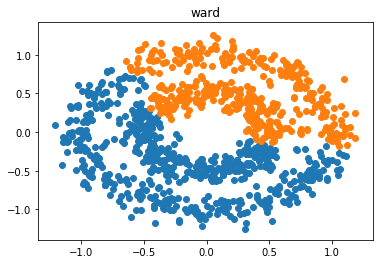

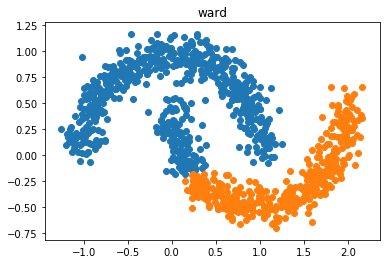

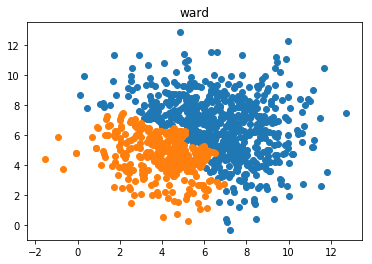

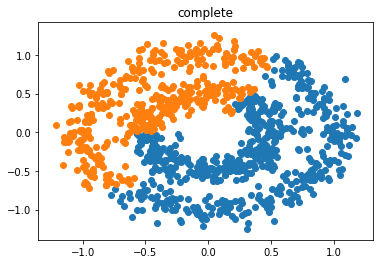

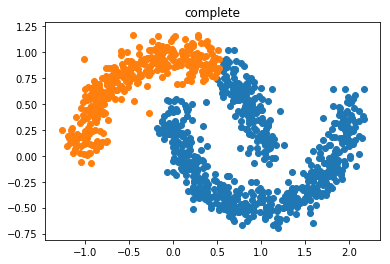

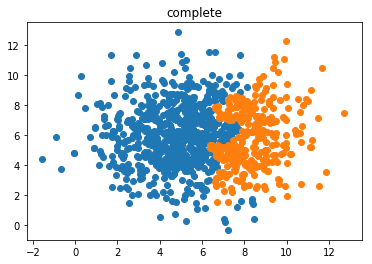

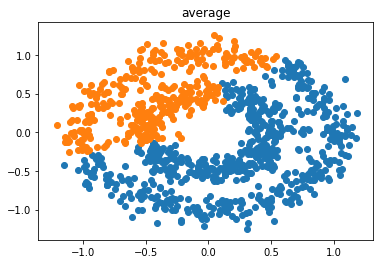

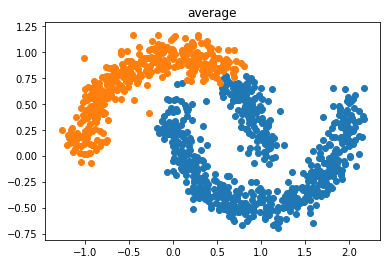

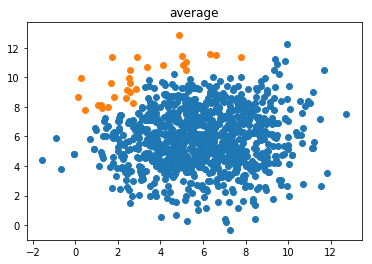

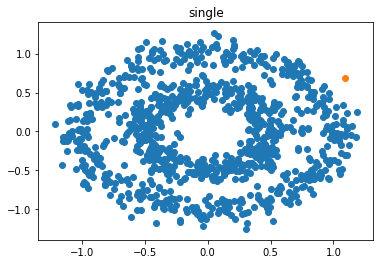

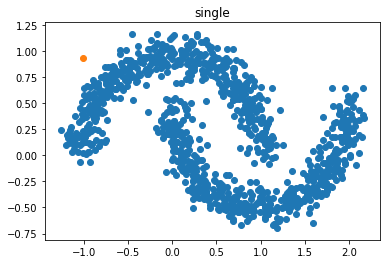

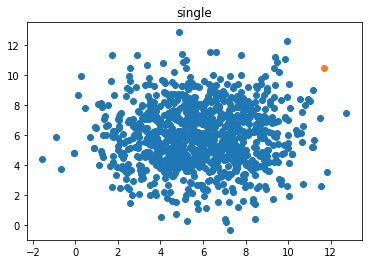

In [55]:
n_samples = 1000
n_clusters = 2
noise = 0.1

samples = [make_circles(n_samples=n_samples, noise=noise, factor = 0.5), make_moons(n_samples=n_samples, noise=noise), make_blobs(n_samples=n_samples, cluster_std=noise*20, centers=n_clusters)]
sample_labels = ["circles", "moons", "blobs"]

linkages = ["ward", "complete", "average", "single"]

for linkage in linkages:
    for sample in samples:
        data = sample[0]
        
        # apply clustering algorithm
        clustering = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                            connectivity=None, 
                            linkage=linkage, memory=None, n_clusters=n_clusters,
                            pooling_func='deprecated')
        clustering.fit(data)
        labels = clustering.labels_
 
   
        # compute score (malfunctions)
        #y_predicted = clustering.fit_predict(data)
        #y = [el[1] for el in data]
        #score = np.floor(100 - np.linalg.norm(y-y_predicted))
        
        # plot
        plt.figure()
        class1 = [];
        class2 = [];
        
        # allocate to classes
        for i in range(labels.size):
            if labels[i] == 0:
                class1.append(data[i])
            elif labels[i] == 1:
                class2.append(data[i])
        
        plt.title(linkage) #+ " / score: " + str(score))
        plt.scatter([x[0] for x in class1], [x[1] for x in class1])
        plt.scatter([x[0] for x in class2], [x[1] for x in class2])

        #print(str(score))

Comments:
 - The ward linkage only works more or less well for the blobs and okay for the moons
 - The complete linkage shows bad performance for all datasets
 - The average linkage has also a bad performace, and depends on initial conditions for the blobs
 - The single linkage tends to create a cluster comprising a single outlier, however, it sometimes workes well for the moons and seems to strongly depend on the initial point that is being chosen

### A1 - b - Compare to performance of t-SNE and k-means

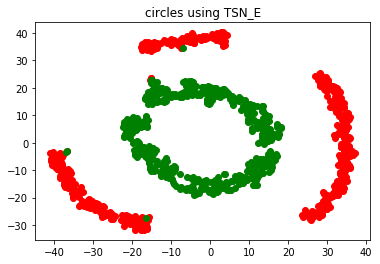

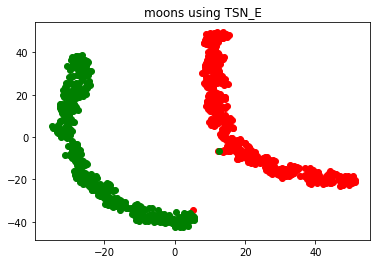

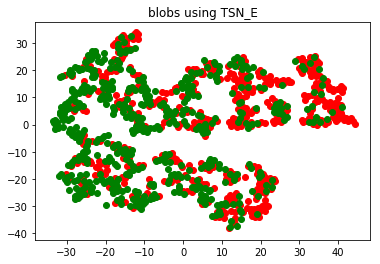

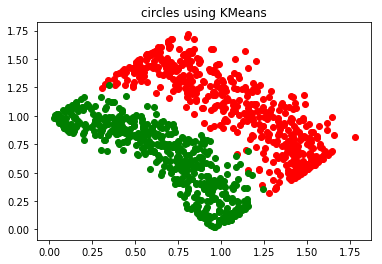

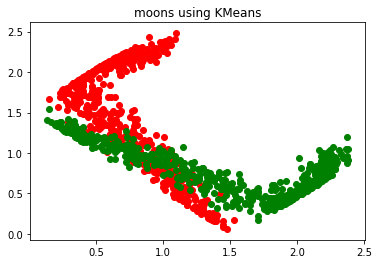

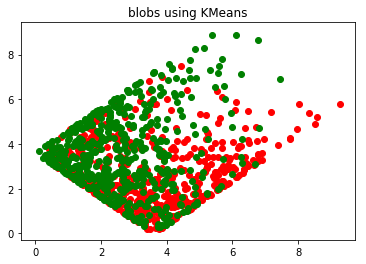

In [57]:
classifiers = [TSNE(n_components=n_clusters), KMeans(n_clusters=n_clusters)]
clf_labels = ["TSN_E", "KMeans"]

j = 0
for clf in classifiers:
    s = 0
    
    for sample in samples:

        # separate into data and classes
        X = sample[0]
        y = sample[1]
        
        # get classes
        red = y == 0
        green = y == 1
        
        # fit model and obtain transform
        clf.fit(X)
        Y = clf.fit_transform(X)
        
        # plot
        plt.figure()
        
        plt.title(sample_labels[s] + " using " + clf_labels[j] )
        plt.scatter(Y[red,0], Y[red, 1], c="r")
        plt.scatter(Y[green,0], Y[green, 1], c="g")
        
        s +=1
    j +=1

Comments:
 - TSN_E works well for the moons and the circles, but fails with the blobs
 - KMeans works well for the circles but fails for moons and blobs

## A2 - AutoEncoder

### A2 - a - Generate 2D images showing polynomials

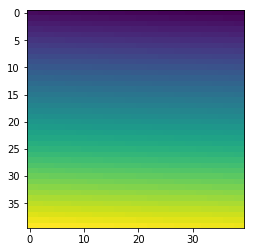

In [68]:
''' WRONG INTERPRETATION OF THE TASK
    CORRECT INTERPRETATION BELOW

def generate_poly(degree, x, polycoeff_range):
    polycoeffs = rd.uniform(coeff_range[0], coeff_range[1], degree+1)
    
    y = np.zeros(x.size)
    
    degree = 0
    for p in polycoeffs:
        y += p * (x**degree)
        degree += 1
    
    return y

# define initial parameters
coeff_range=[-1,1]
x = np.linspace(-20,20, 41)


# generate polynomials and corresponding pixel images
for degree in range(3):
    y = generate_poly(degree, x, coeff_range)

    # plot image
    plt.figure()
    ax = plt.gca()
    plt.xlim([x[0], x[-1]])
    plt.ylim([x[0], x[-1]])
    ax.axis('off')
    
    plt.plot(x, y)
    plt.savefig("fig.png")
    plt.show()
    
    # pixelate image
    basewidth = 40
    img=Image.open("fig.png")
    wpercent = (basewidth/float(img.size[0]))
    hsize = int((float(img.size[1])*float(wpercent)))
    img = img.resize((basewidth,hsize), Image.ANTIALIAS)
    
    ax.axis('off')  
    img.save("fig.png")
    img=mpimg.imread("fig.png")
    ax.axis('off')
    imgplot=plt.imshow(img)
    plt.show()
  

def generate_pixelated_image(xdata, ydata):
    # generate pixel image
    length = xdata.size
    image = np.zeros(shape=(length, length))

    # treat every column
    for col in range(length):
        # check whether yval belongs to a certain pixel
        for row in range(length):
            
            # access yval for that column
            yval = ydata[row]
            
            # check which pixel it corresponds to
            if yval >= xdata[row] and yval < xdata[row]+1:

                image[col][row] = 1
                
    return image  
'''    
    
# define points
x=np.linspace(-1,1,40)
xx,yy=np.meshgrid(x,x)

       
# define polynomial generation
def generate_poly(deg, xx=xx, yy=yy):
    x_coeffs=np.random.uniform(-5.,5., deg+1)
    y_coeffs=np.random.uniform(-5.,5., deg+1)
    
    img=np.zeros((40,40))
    
    for d in range(deg+1):
        img+=x_coeffs[d]*xx**d + y_coeffs[d]*yy**d 
        
    return img


# sample images
samples=[]
n_samples = 5000

for i in range(n_samples):
    deg=int(np.random.uniform(1,2))
    samples.append(generate_poly(deg))
samples=np.array(samples)

plt.imshow(samples[0]) 
plt.show()

### A2 - b - Build two autoencoder architectures

In [84]:
# build autoencoders

# input parameter
input_size = 1600
hidden_size1 = 400
hidden_size2 = 200
hidden_size3 = 40
code_size = 10

# single hidden dense layer
input_img_s = Input(shape=(input_size,))
code_s = Dense(code_size, activation='relu')(input_img_s)
output_img_s = Dense(input_size, activation='sigmoid')(code_s)
autenc_small = Model(input_img_s, output_img_s)

# several hidden dense layers
input_img_l = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size1, activation='relu')(input_img_l)
hidden_2 = Dense(hidden_size2, activation='relu')(hidden_1)
hidden_3 = Dense(hidden_size3, activation='relu')(hidden_2)
code_l = Dense(code_size, activation='relu')(hidden_3)
hidden_3r = Dense(hidden_size3, activation='relu')(code_l)
hidden_2r = Dense(hidden_size2, activation='relu')(hidden_3r)
hidden_1r = Dense(hidden_size1, activation='relu')(hidden_2r)
output_img_l = Dense(input_size, activation='sigmoid')(hidden_1r)
autenc_large = Model(input_img_l, output_img_l)



In [85]:
samples=samples.reshape((len(samples), np.prod(samples.shape[1:])))

# compile and fit
autencs = [autenc_small, autenc_large]
for autenc in autencs:
    autenc.summary()
    autenc.compile(optimizer='adam', loss='binary_crossentropy')
    autenc.fit(samples, samples, epochs=20, batch_size=256, shuffle=True)
    # output and input should be same!
    
    

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_33 (InputLayer)        (None, 1600)              0         
_________________________________________________________________
dense_145 (Dense)            (None, 10)                16010     
_________________________________________________________________
dense_146 (Dense)            (None, 1600)              17600     
Total params: 33,610
Trainable params: 33,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
5000/5000 [==============================] - 3s 515us/step - loss: -7.7700
Epoch 2/20
5000/5000 [==============================] - 1s 148us/step - loss: -36.8380
Epoch 3/20
5000/5000 [==============================] - 1s 163us/step - loss: -44.8854
Epoch 4/20
5000/5000 [==============================] - 1s 140us/step - loss: -45.4822
Epoch 5/20
5000/5000 [==============================] -

Result: surprisingly, the loss is for both architectures about the same. This holds for various sizes of the coding layer.


### A2 - c - Visualize the results of latent dimensions

In [86]:
def layer_to_visualize(layer):
    inputs = [K.learning_phase()] + model.inputs

    _convout1_f = K.function(inputs, [layer.output])
    def convout1_f(X):
        # The [0] is to disable the training phase flag
        return _convout1_f([0] + [X])

    convolutions = convout1_f(img_to_visualize)
    convolutions = np.squeeze(convolutions)

    print ('Shape of conv:', convolutions.shape)

    n = convolutions.shape[0]
    n = int(np.ceil(np.sqrt(n)))

    # Visualization of each filter of the layer
    fig = plt.figure(figsize=(12,8))
    for i in range(len(convolutions)):
        ax = fig.add_subplot(n,n,i+1)
        ax.imshow(convolutions[i], cmap='gray')

# Specify the layer to want to visualize
layer_to_visualize(code_s)
layer_to_visualize(code_r)

AttributeError: 'Tensor' object has no attribute 'output'

## A3 - KL - divergence

Let $X = \{x_1, x_2\}$. 
Let $P(x_1) = 0.2$ and $P(x_2) = 0.8$ as well as 
$Q(x_1) = 0.5$ and $Q(x_2) = 0.5$. Then,

$D_{KL}(P||Q) = \sum_{x\in X} P(x) \log(\frac{P(x)}{Q(x)}) = 0.2 \cdot \log(0.2/0.5) + 0.8 \cdot \log(0.8/0.5) \approx 0.193 $ and

$D_{KL}(Q||P) = \sum_{x\in X} Q(x) \log(\frac{Q(x)}{P(x)}) = 0.5 \cdot \log(0.5/0.2) + 0.5 \cdot \log(0.5/0.8) \approx 0.223 $.

Hence $D_{KL}(P||Q) \neq D_{KL}(Q||P)$ in general.